**Heart Diseases Analysis**

**Importing Libraries**

In [1]:
#!pip3 install bubbly
#!pip3 install pandas-profiling
#!pip3 install shap

In [2]:
# for basic operations
import numpy as np
import pandas as pd
#import dtale
# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns
# for advanced visualizations 
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from bubbly.bubbly import bubbleplot
# for providing path
import os
# for model 
import pycaret
import shap

%matplotlib inline

/home/mone/.local/lib/python3.6/site-packages/google/colab/data_table.py:30: UserWarning:

IPython.utils.traitlets has moved to a top-level traitlets package.



In [4]:
# reading the data
dataset = pd.read_csv('heart.csv')
data = dataset.copy()
# getting the shape
data.shape

(303, 14)

In [5]:
# getting info about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


**Data Description**

age: The person's age in years


sex: The person's sex (1 = male, 0 = female)


cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)


trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)


chol: The person's cholesterol measurement in mg/dl


fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)


restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)


thalach: The person's maximum heart rate achieved


exang: Exercise induced angina (1 = yes; 0 = no)


oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)


slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)


ca: The number of major vessels (0-3)


thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)


target: Heart disease (0 = no, 1 = yes)


In [6]:
# reading the head of the data
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
# describing the data
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Data Visualizations

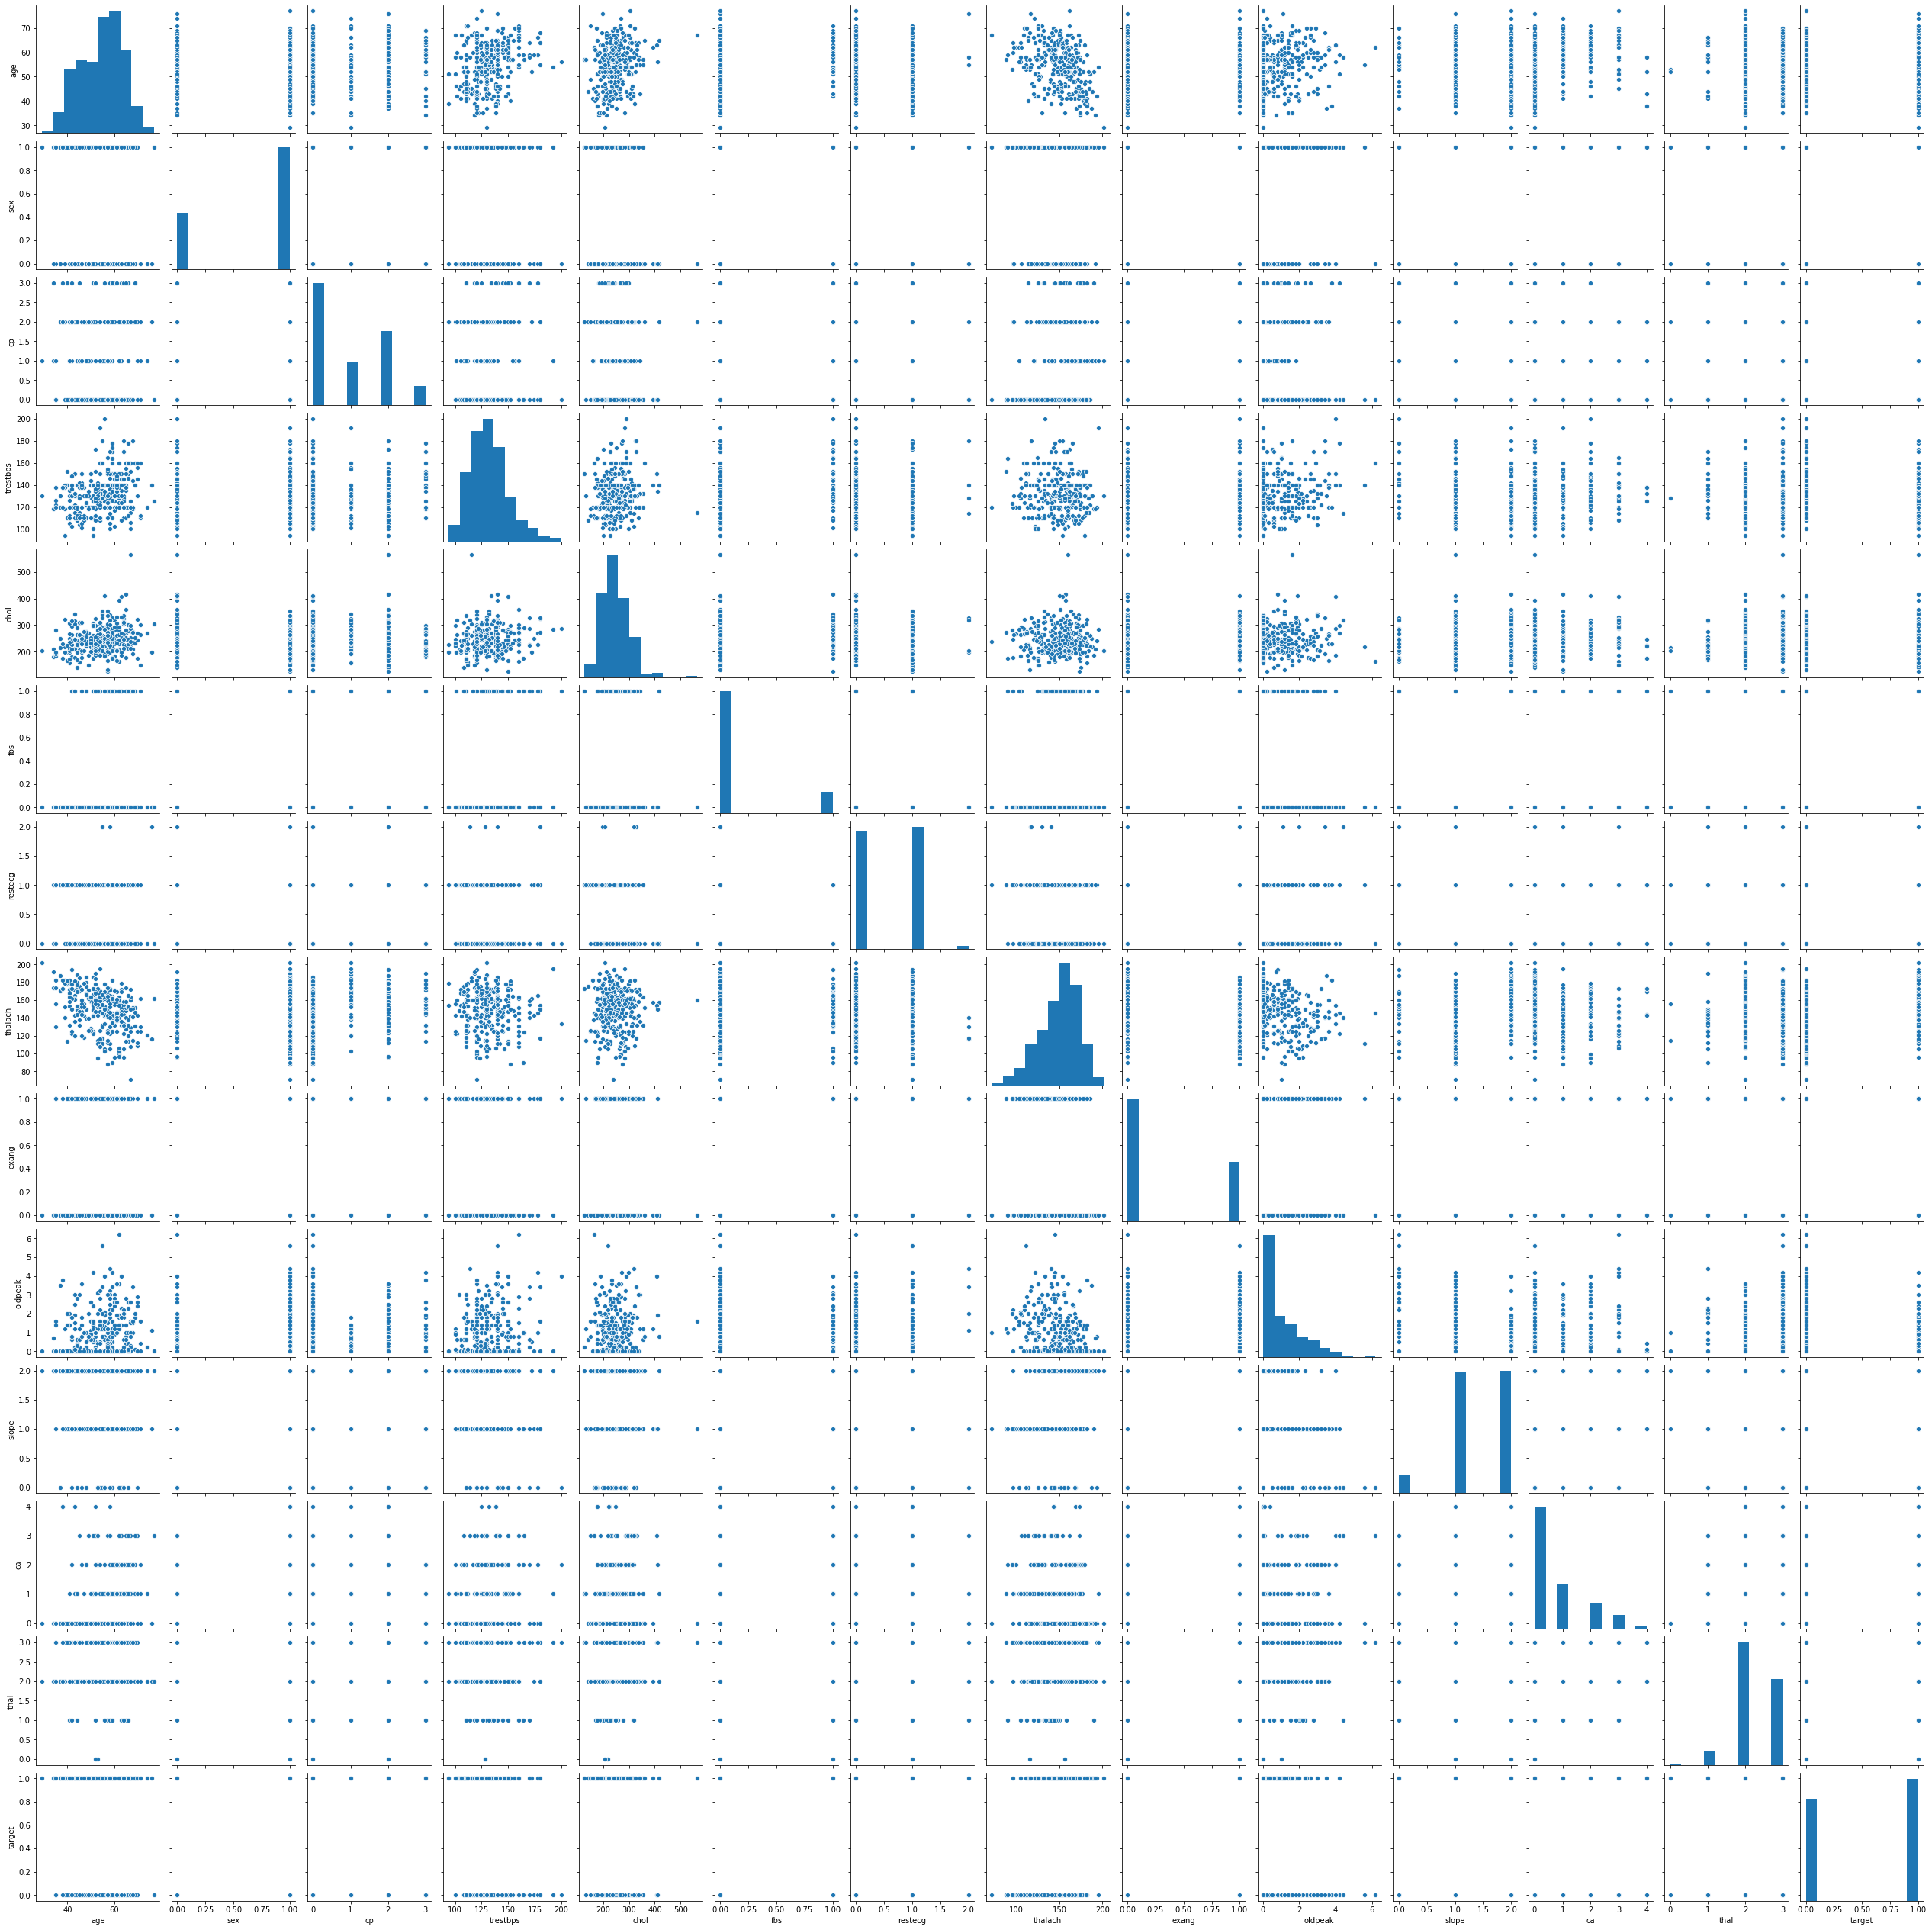

In [9]:
sns.pairplot(data)

In [10]:
import warnings
warnings.filterwarnings('ignore')
figure = bubbleplot(dataset = data, x_column = 'trestbps', y_column = 'chol', 
    bubble_column = 'sex', time_column = 'age', size_column = 'oldpeak', color_column = 'sex', 
    x_title = "Resting Blood Pressure", y_title = "Cholestrol", title = 'BP vs Chol. vs Age vs Sex vs Heart Rate',
    x_logscale = False, scale_bubble = 3, height = 650)
py.plot(figure, config={'scrollzoom': True})

'temp-plot.html'

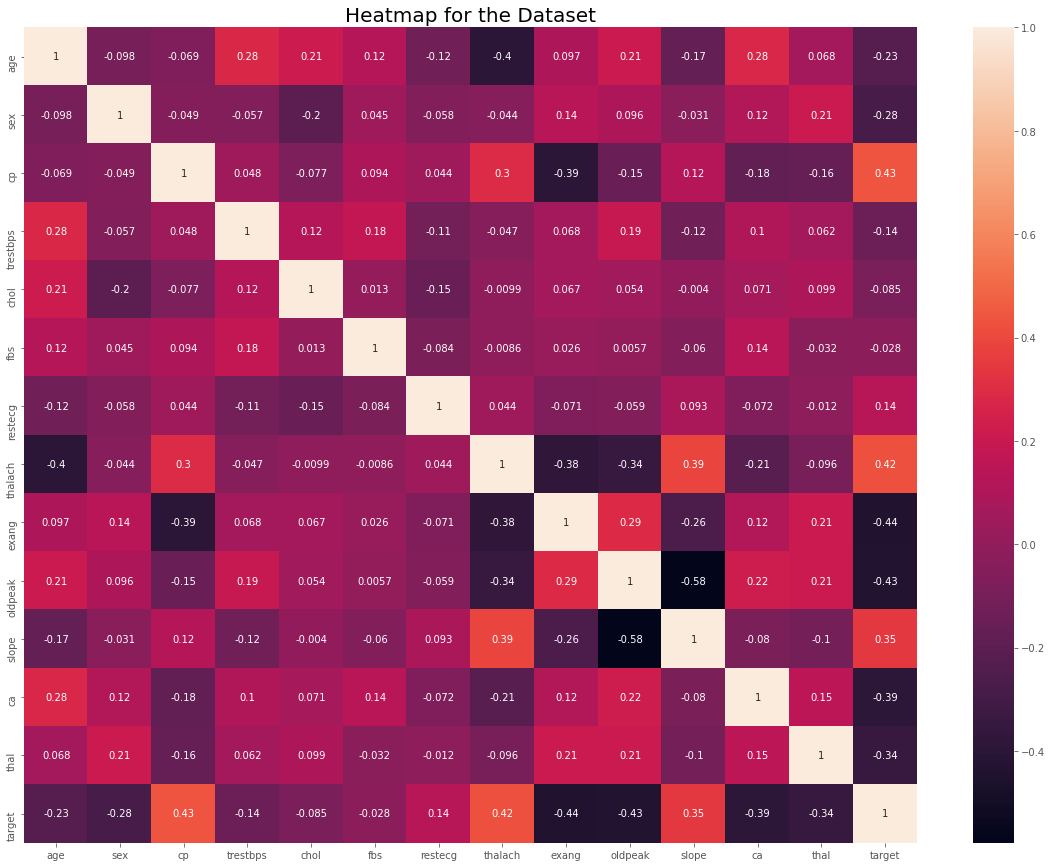

In [11]:
# making a heat map
plt.rcParams['figure.figsize'] = (20, 15)
plt.style.use('ggplot')
sns.heatmap(data.corr(), annot = True)
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()

> The above heat map is to show the correlations amongst the different attributes of the given dataset. The above Heat Map shows that almost all of the features/attributes given in the dataset are very less correlated with each other. This implies we must include all of the features, as we can only eliminate those features where the correlation of two or more features are very high.

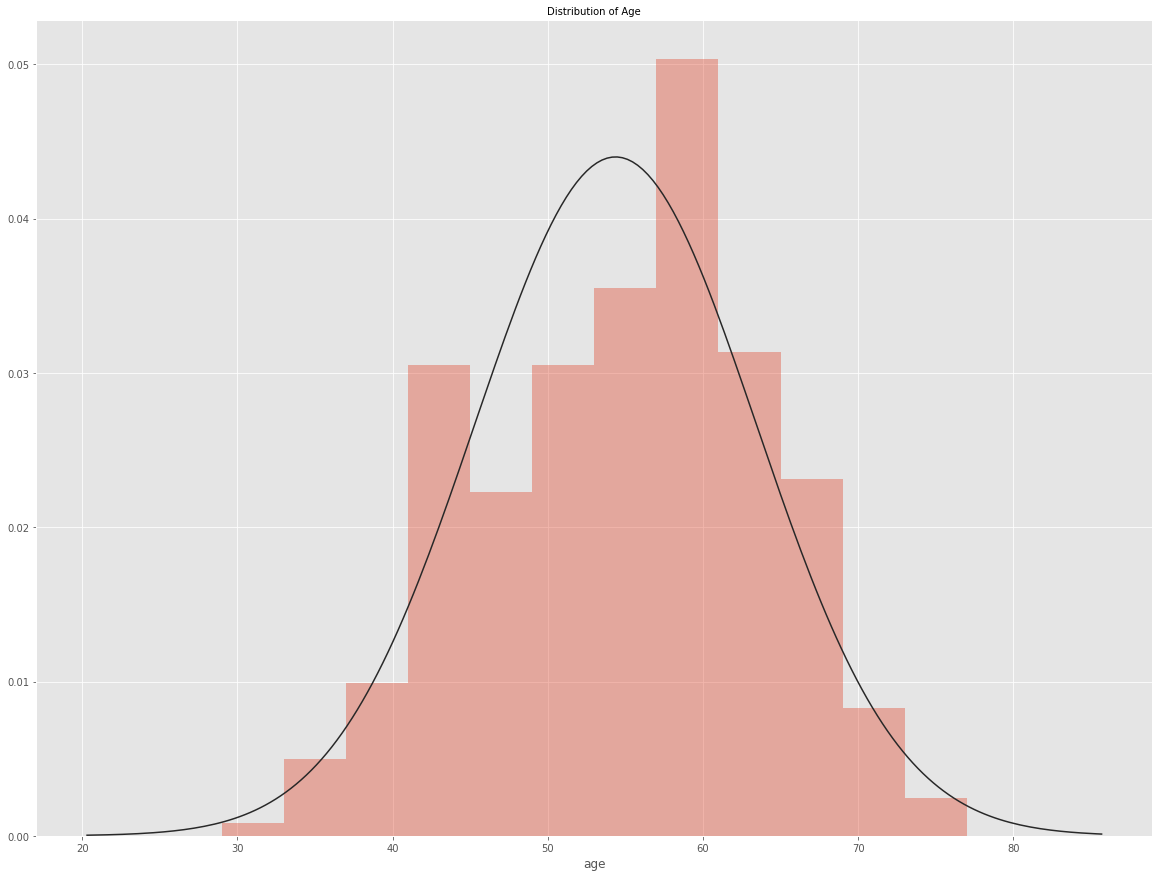

In [12]:
# checking the distribution of age among the patients
from scipy.stats import norm
sns.distplot(data['age'], fit=norm, kde=False)
plt.title('Distribution of Age', fontsize = 10)
plt.show()

> The above Distribution plot shows the distribution of Age amongst all of the entries in the dataset about the heart patients. The Graph suggests that the highest number of people suffering from heart diseases are in the age group of 55-65 years. The patients in the age group 20-30 are very less likely to suffer from heart diseases.
>> As we know that the number of people in the age group 65-80 has a very low population, hence distribution is also less. we might have to opt for other plots to investigate further and get some more intuitive results.

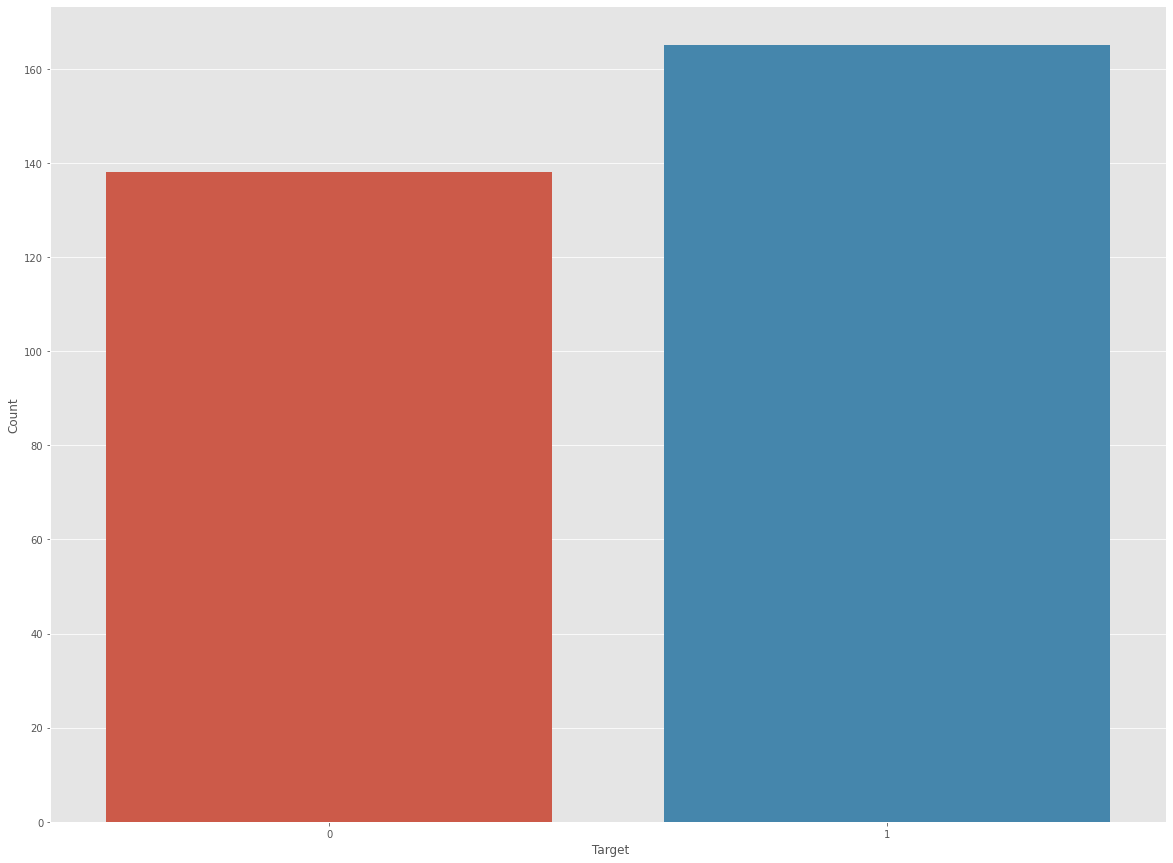

In [13]:
# Checking Target
sns.countplot(data['target'])
plt.xlabel(" Target")
plt.ylabel("Count")
plt.show()

The dataset is quite balanced with almost equal number of Positive and Negative Classes. The Positive Class says that the patient is suffering from the disease and the Negative class says that the patient is not suffering from the disease.

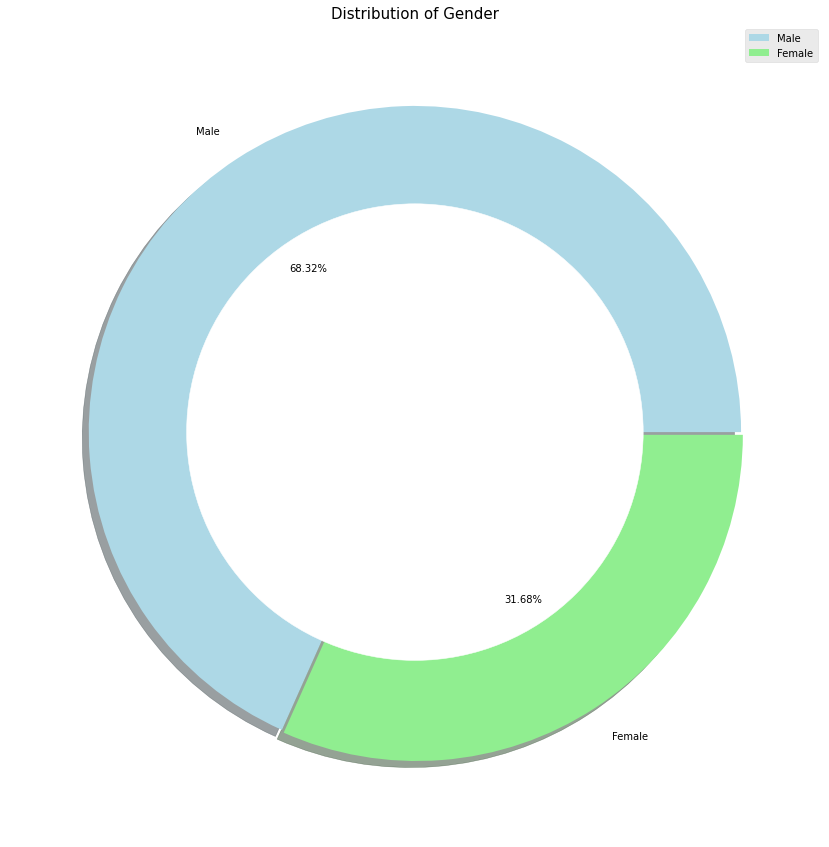

In [14]:
# plotting a donut chart for visualizing each of the recruitment channel's share
size = data['sex'].value_counts()
colors = ['lightblue', 'lightgreen']
labels = "Male", "Female"
explode = [0, 0.01]
my_circle = plt.Circle((0, 0), 0.7, color = 'white')
plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('Distribution of Gender', fontsize = 15)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

> The above Pie chart, whhich shows us the distribution of Gender in the Heart diseases. By looking at the plot, we can **assume** that Males are two times more likely to suffer from heart diseases in comparison to females.
>> According to our study, From all the Entries in our dataset 68% of the patients are men whereas only 32% are women. More number of men took participation in heart disease check ups.

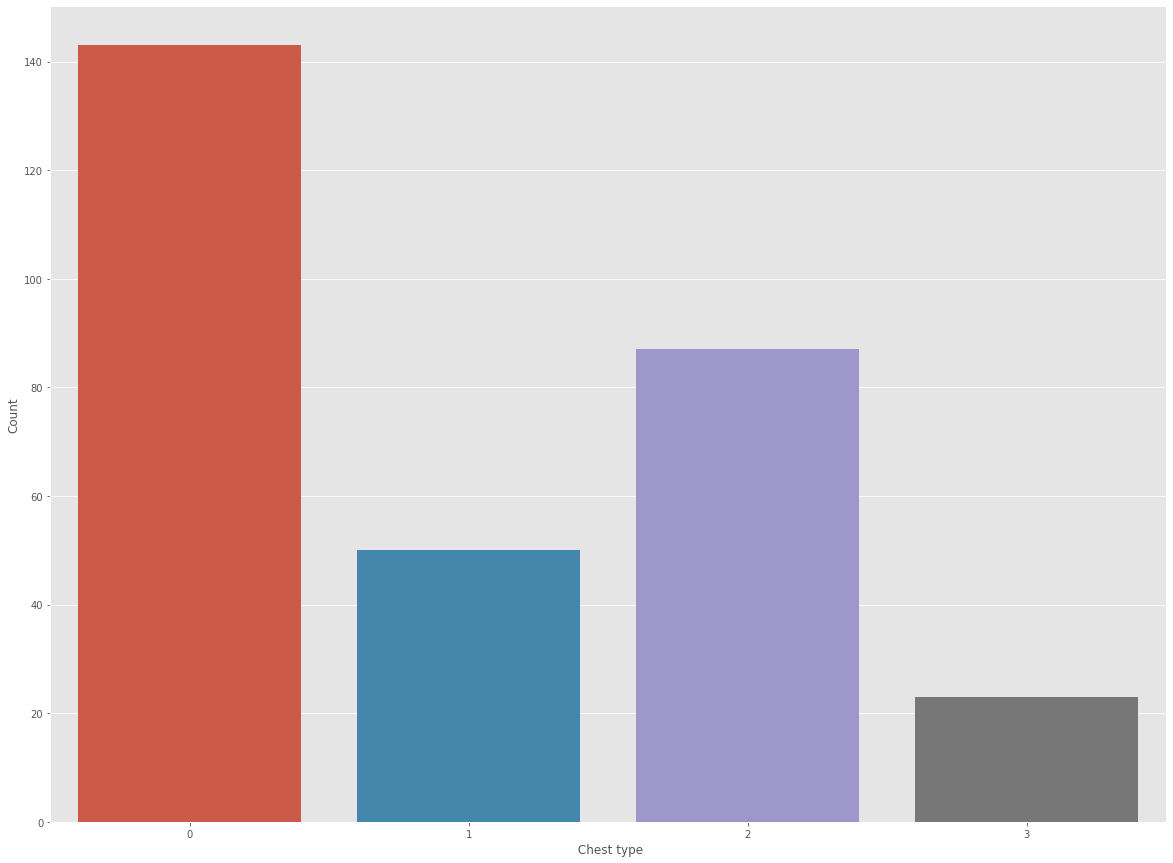

In [15]:
# Checking chest type
sns.countplot(data['cp'])
plt.xlabel(" Chest type")
plt.ylabel("Count")
plt.show()

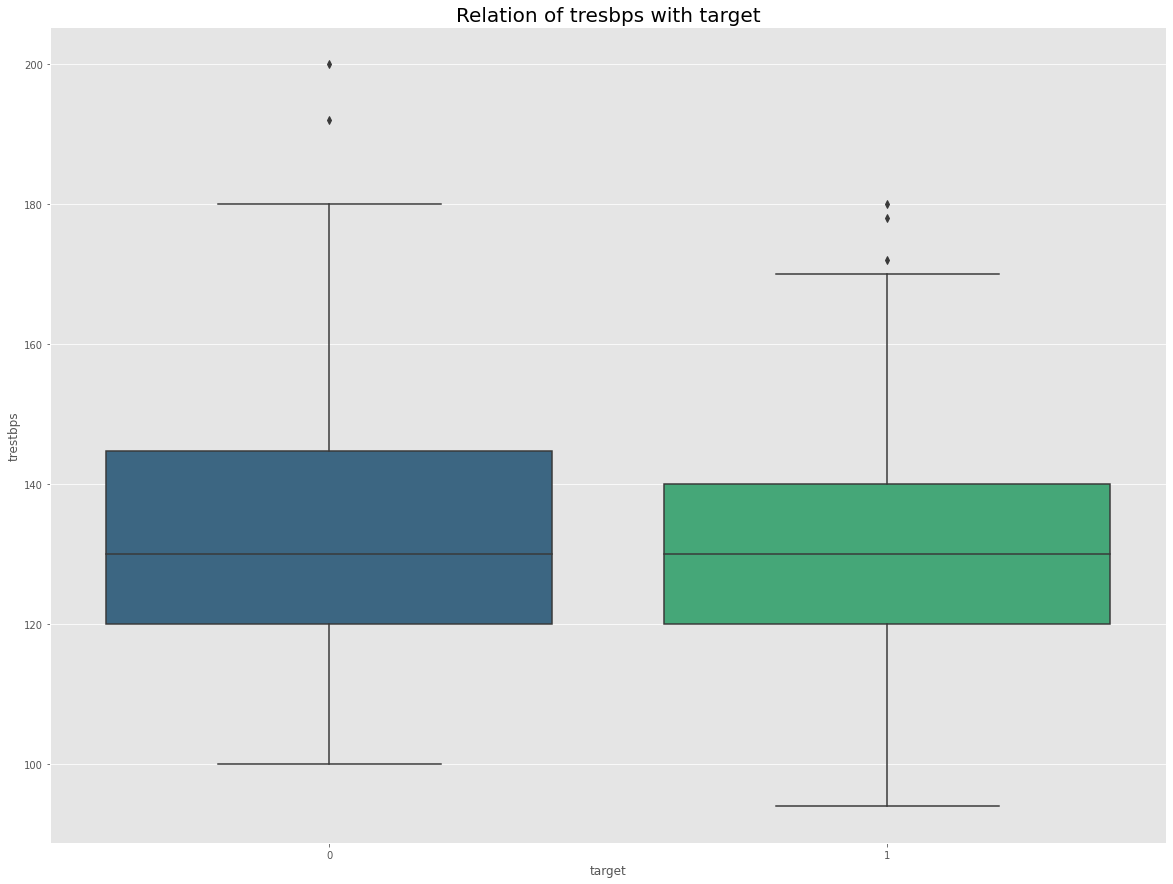

In [16]:
# tresbps vs target
sns.boxplot(data['target'], data['trestbps'], palette = 'viridis')
plt.title('Relation of tresbps with target', fontsize = 20)
plt.show()

> tresbps: Resting Blood Pressure, The above Bivariate plot between tresbps(the resting blood pressure of a patient), and the target which says that whether the patient is suffering from the heart disease or not. The plot clearly suggests that the patients who are most likely to not suffer from the disease have a slighly greater blood pressure than the patients who have heart diseases.

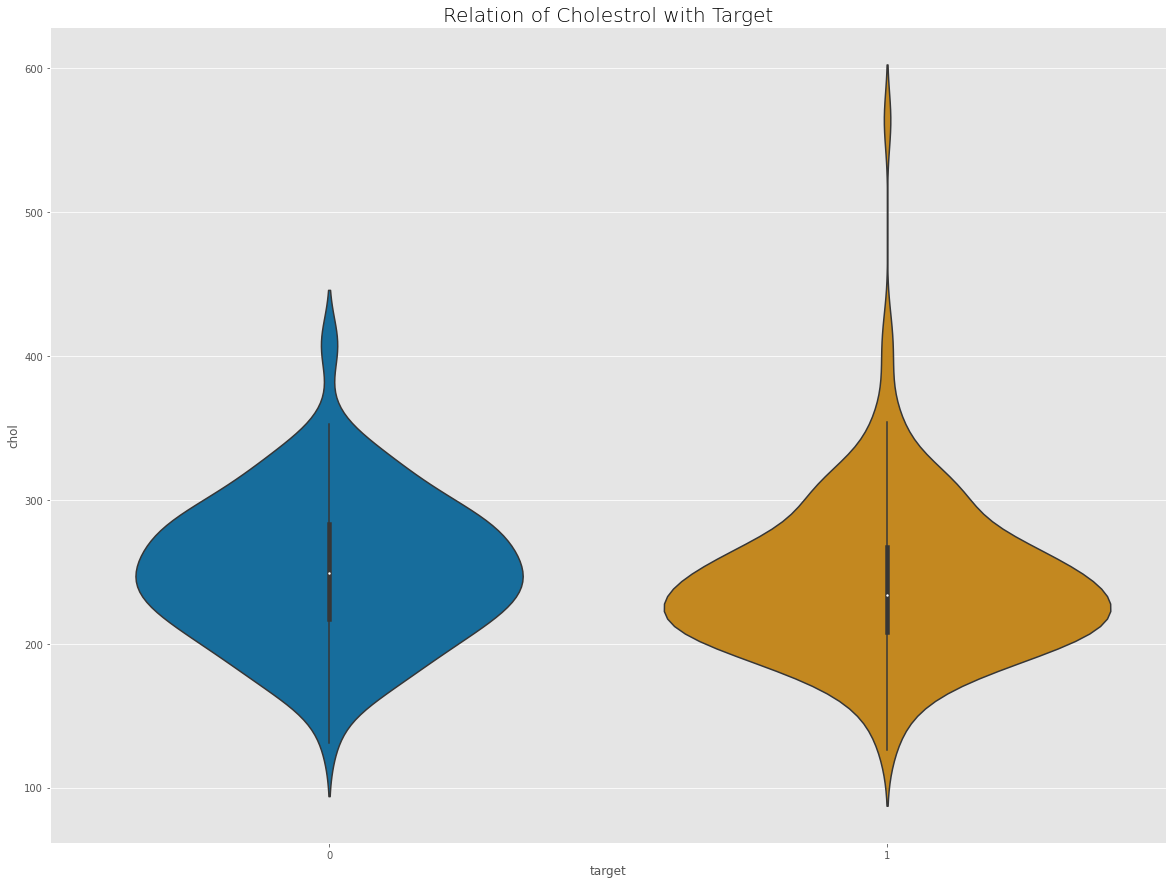

In [17]:
# cholestrol vs target
sns.violinplot(data['target'], data['chol'], palette = 'colorblind')
plt.title('Relation of Cholestrol with Target', fontsize = 20, fontweight = 30)
plt.show()

> The above Bivariate plot between cholestrol levels and target suggests that the Patients likely to suffer from heart diseases are having higher cholestrol levels in comparison to the patients with target 0(likely to not suffer from the heart diseases.
>> Hence, we can infer from the above plot that the cholestrol levels plays an important role in determining heart diseases. We all must keep our cholestrol levels in control as possible.

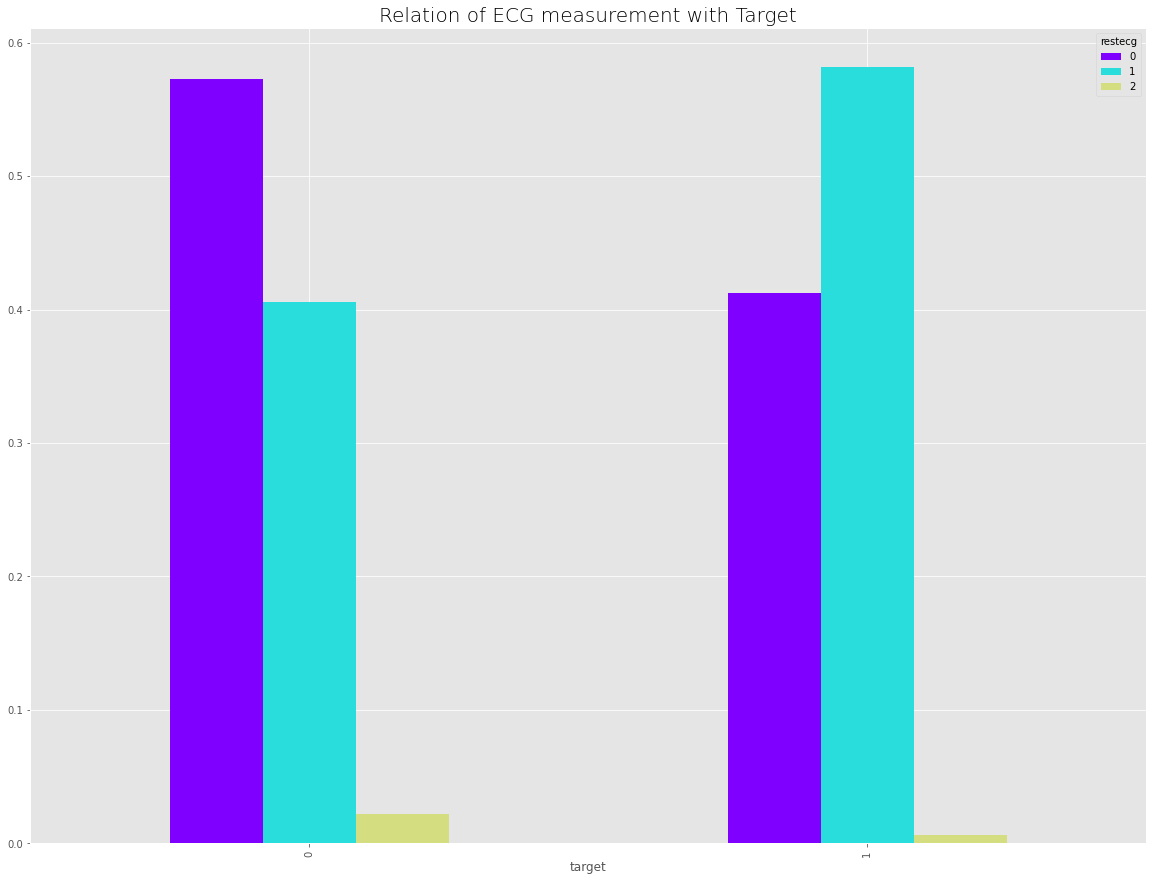

In [18]:
# Resting electrocardiographic measurement vs target
  
dat = pd.crosstab(data['target'], data['restecg']) 
dat.div(dat.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                                 stacked = False, 
                                                 color = plt.cm.rainbow(np.linspace(0, 1, 4)))
plt.title('Relation of ECG measurement with Target', fontsize = 20, fontweight = 30)
plt.show()

> The above plot is column bar chart representing target vs ECG Measurements(Electro Cardio Gram), The above plot shows that the more number of patients not likely to suffer from heart diseases are having restscg value 0 whereas more number of people have restecg value 1 in case of more likelihood of suffering from a heart disease.

> This Heat Map, between Target and Maximum Heart Rate shows that the patients who are likely to suffer from heart diseases are having higher maximum heart rates whereas the patients who are not likely to suffer from any heart diseases are having lower maximum heart rates.
>> This implies it is very important to keep our heart rates low, to keep ourselves healthy and safe from any dangerous heart diseases.

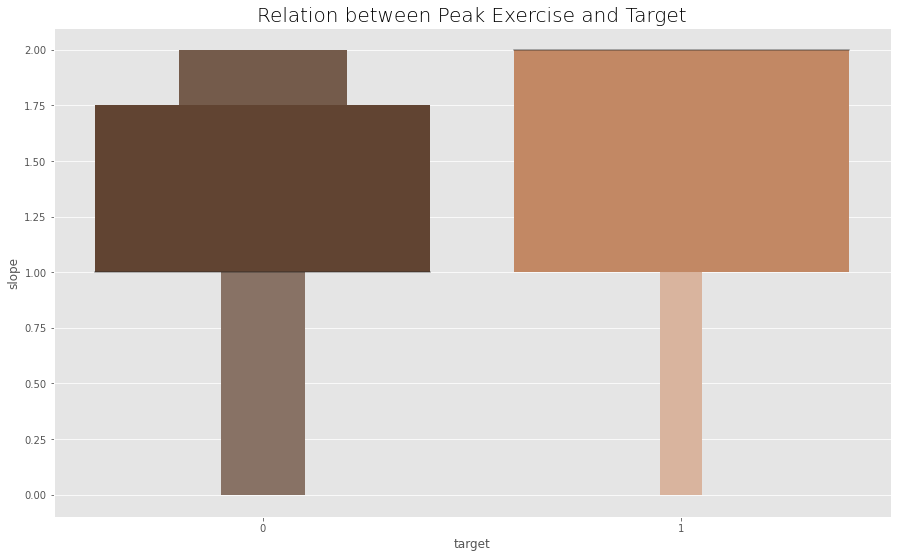

In [19]:
# slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
# checking the relation between slope and target

plt.rcParams['figure.figsize'] = (15, 9)
sns.boxenplot(data['target'], data['slope'], palette = 'copper')
plt.title('Relation between Peak Exercise and Target', fontsize = 20, fontweight = 30)
plt.show()

> Slope : 0 refers to upsloping, 1 refers to flat Exercises pattern.
>>This plot clearly shows that the patients who are not likely to suffer from any heart diseases are mostly having value 1 means upsloping, whereas very few people suffering from heart diseases have upsloping pattern in exercises.
>> Also, Flat Exercises are mostly seen in the cases of Patients who are more likely to suffer from heart diseases.

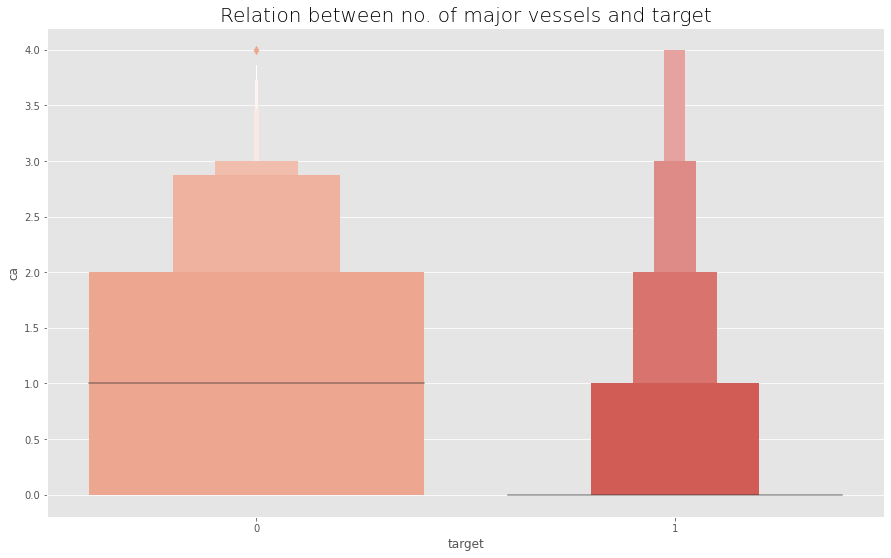

In [20]:
#ca: The number of major vessels (0-3)

sns.boxenplot(data['target'], data['ca'], palette = 'Reds')
plt.title('Relation between no. of major vessels and target', fontsize = 20, fontweight = 30)
plt.show()

> The above Bivariate plot between Target and Number of Major Vessels, shows that the patients who are more likely to suffer from Heart diseases are having high values of Major Vessels wheras the patiets who are very less likely to suffer from any kind of heart diseases have very low values of Major Vessels.
>> Hence, It is also helpful in determining the heart diseases, the more the number of vessels, the more is the chance of suffering from heart diseases.

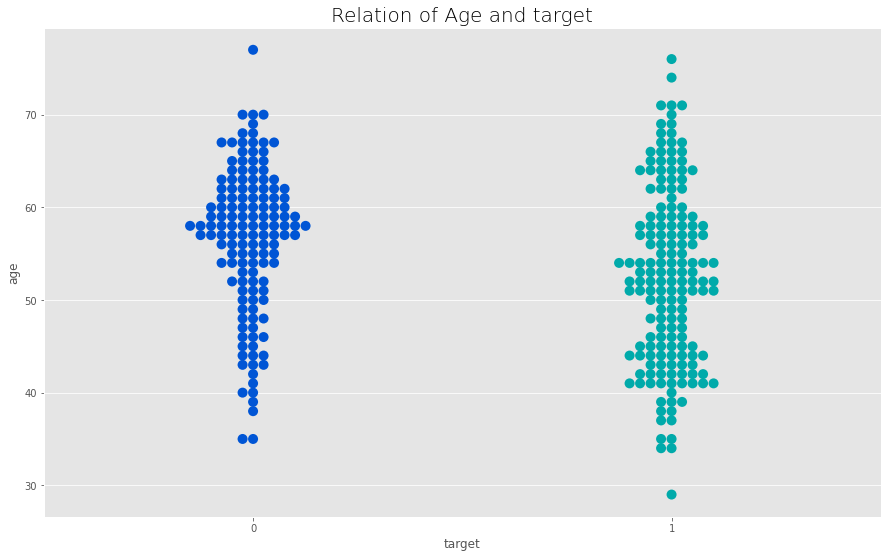

In [21]:
# relation between age and target

plt.rcParams['figure.figsize'] = (15, 9)
sns.swarmplot(data['target'], data['age'], palette = 'winter', size = 10)
plt.title('Relation of Age and target', fontsize = 20, fontweight = 30)
plt.show()

> From the above Swarm plot between the target and the age of the patients, we are not able to find any clue or pattern, so age is not a very good attribute to determine the heart disease of a patient as a patient of heart diseases range from 30-70, whereas it is not important that all of the people lying in that same age group are bound to suffer from the heart diseases.

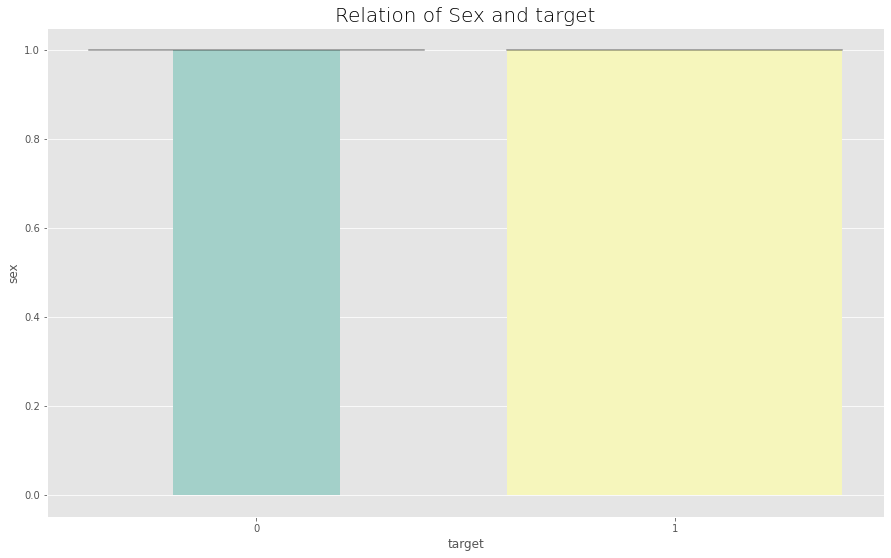

In [22]:
# relation between sex and target
sns.boxenplot(data['target'], data['sex'], palette = 'Set3')
plt.title('Relation of Sex and target', fontsize = 20, fontweight = 30)
plt.show()

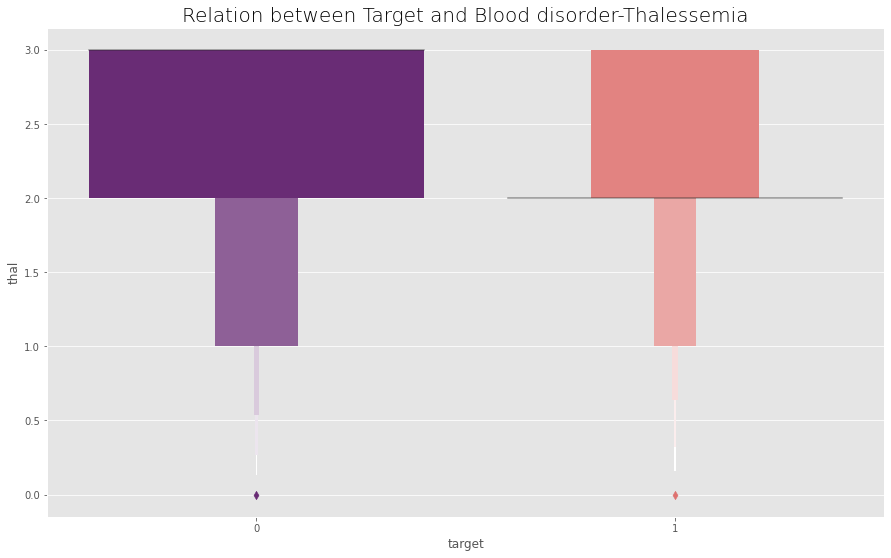

In [23]:
# checking the relation between 
#thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

sns.boxenplot(data['target'], data['thal'], palette = 'magma')
plt.title('Relation between Target and Blood disorder-Thalessemia', fontsize = 20, fontweight = 30)
plt.show()

>In the above Boxen plot between Target and a Blood disorder called Thalessemia, It can be easily inferred that the patients suffering from heart diseases have low chances of also suffering from thalessemia in comparison to the patients who are less likely to suffer from the heart diseases. Hence, It is also a good feature to classify heart diseases.

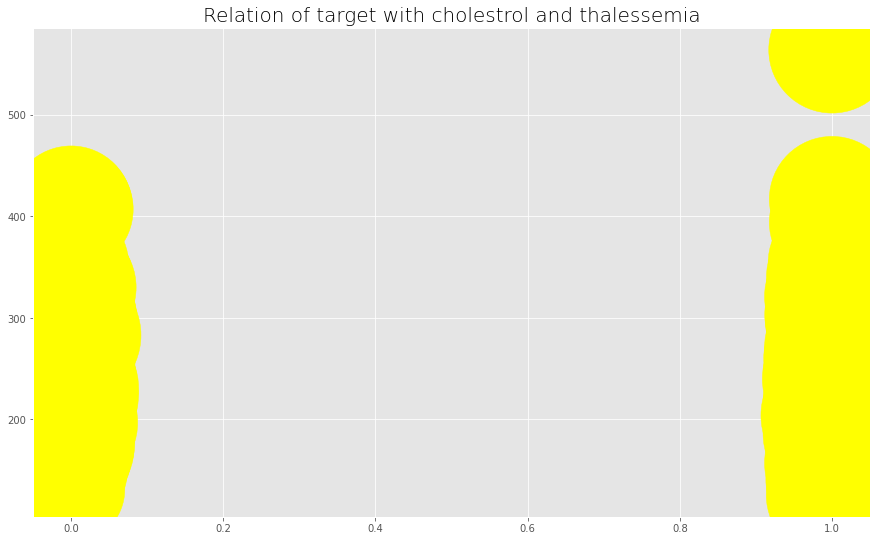

In [24]:
# target vs chol and hue = thalach

plt.scatter(x = data['target'], y = data['chol'], s = data['thalach']*100, color = 'yellow')
plt.title('Relation of target with cholestrol and thalessemia', fontsize = 20, fontweight = 30)
plt.show()

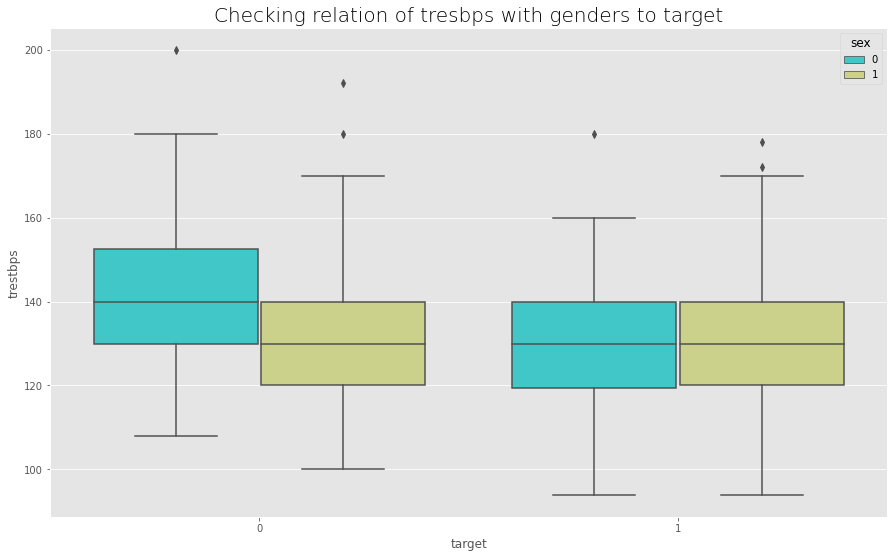

In [25]:
# multi-variate analysis
sns.boxplot(x = data['target'], y = data['trestbps'], hue = data['sex'], palette = 'rainbow')
plt.title('Checking relation of tresbps with genders to target', fontsize = 20, fontweight = 30)
plt.show()

> In the above Box plot between Target and tresbps wrt Gender, shows that Women have higher tresbps than men in case of not suffering from any heart diseases, whereas men and women have almost equal tresbps in case of suffering from a heart diseases. Also, In case of suffering from heart diseases, patients have a slightly lower tresbps in comparison to the patients who are not suffering from heart diseases.

## Preparing data to Model

In [51]:
#check the shape of data
dataset.shape

(303, 14)

In [52]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [53]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index).reset_index(drop=True)
data.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))


Data for Modeling: (288, 14)
Unseen Data For Predictions: (15, 14)


### Setting up Environment in PyCaret

In [54]:
from pycaret.classification import *

exp_clf101 = setup(data = data, target = 'target', session_id=123,
                   normalize = True, 
                   transformation = True, 
                   ignore_low_variance = True,
                   remove_multicollinearity = True, 
                   multicollinearity_threshold = 0.95)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(288, 14)"
4,Missing Values,False
5,Numeric Features,5
6,Categorical Features,8
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


### Comparing All Models

In [55]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,K Neighbors Classifier,0.8412,0.8724,0.8659,0.8612,0.8576,0.6777
1,Logistic Regression,0.8257,0.8968,0.8553,0.8415,0.8436,0.6461
2,Extreme Gradient Boosting,0.806,0.8848,0.8189,0.8428,0.8258,0.6059
3,CatBoost Classifier,0.8012,0.885,0.8197,0.8341,0.8204,0.5965
4,Ridge Classifier,0.801,0,0.8553,0.8106,0.8265,0.5927
5,Light Gradient Boosting Machine,0.801,0.8795,0.8189,0.8271,0.82,0.5965
6,Extra Trees Classifier,0.7919,0.8808,0.8114,0.8255,0.8115,0.5772
7,Linear Discriminant Analysis,0.7862,0.8902,0.8379,0.8027,0.8142,0.5624
8,Gradient Boosting Classifier,0.776,0.8497,0.7742,0.8305,0.7954,0.5467
9,Random Forest Classifier,0.771,0.8745,0.7386,0.8415,0.7793,0.5424


### Creating a Model

In [61]:
lr = create_model('lr', fold = 10, round = 3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.857,0.907,0.917,0.846,0.880,0.704
1,0.700,0.798,0.727,0.727,0.727,0.394
2,1.000,1.000,1.000,1.000,1.000,1.000
3,0.700,0.788,0.818,0.692,0.750,0.381
4,0.900,0.990,0.818,1.000,0.900,0.802
5,0.800,0.818,0.909,0.769,0.833,0.588
6,0.750,0.879,0.636,0.875,0.737,0.510
7,0.900,0.980,1.000,0.846,0.917,0.794
8,0.900,0.960,0.909,0.909,0.909,0.798
9,0.750,0.848,0.818,0.750,0.783,0.490


In [62]:
#trained model object is stored in the variable 'lr'. 
print(lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


### Tuning a Model

In [66]:
tuned_lr = tune_model('lr', fold = 10, round = 3, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.857,0.907,0.917,0.846,0.880,0.704
1,0.700,0.808,0.727,0.727,0.727,0.394
2,1.000,1.000,1.000,1.000,1.000,1.000
3,0.700,0.778,0.818,0.692,0.750,0.381
4,0.900,0.990,0.818,1.000,0.900,0.802
5,0.800,0.798,0.909,0.769,0.833,0.588
6,0.750,0.879,0.636,0.875,0.737,0.510
7,0.900,0.980,1.000,0.846,0.917,0.794
8,0.900,0.939,0.909,0.909,0.909,0.798
9,0.700,0.838,0.818,0.692,0.750,0.381


In [69]:
# Check parameters
plot_model(tuned_lr, plot = 'parameter')

,Parameters
C,1.94
class_weight,None
dual,False
fit_intercept,True
intercept_scaling,1
l1_ratio,None
max_iter,100
multi_class,auto
n_jobs,None
penalty,l2


### Model visualization

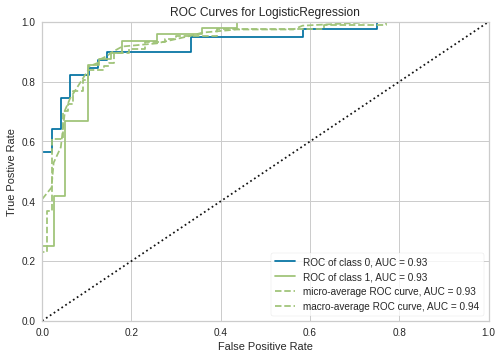

In [70]:
#AUC plot
plot_model(tuned_lr, plot = 'auc')

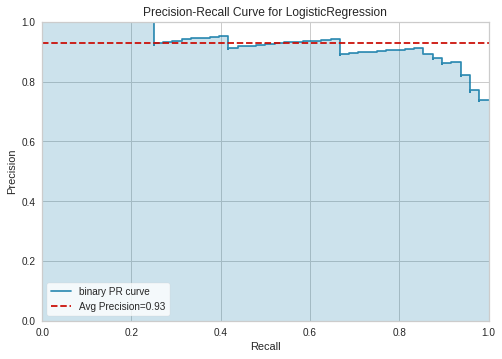

In [71]:
# Precision-Recall Curve
plot_model(tuned_lr, plot = 'pr')

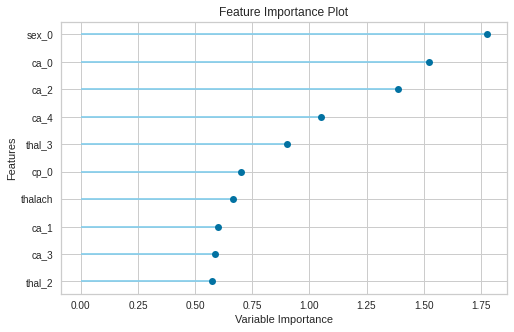

In [72]:
# Feature Importance 
plot_model(tuned_lr, plot='feature')

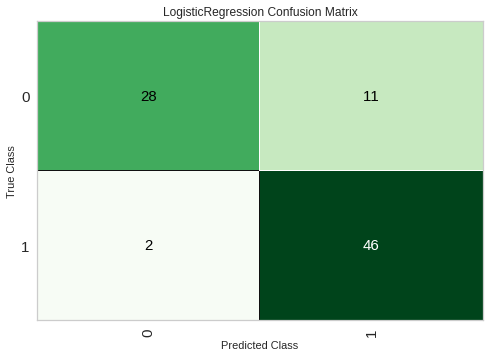

In [73]:
# Confusion Matrix
plot_model(tuned_lr, plot = 'confusion_matrix')

In [74]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### Prediction

In [75]:
predict_model(tuned_lr);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Logistic Regression,0.8506,0.9284,0.9583,0.807,0.8762,0.6912


### Finalize Model for Deployment

In [76]:
final_lr = finalize_model(tuned_lr)
print(final_lr)

LogisticRegression(C=1.94, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


### Predicting on Unseen Data

In [77]:
unseen_predictions = predict_model(final_lr, data=data_unseen)
unseen_predictions.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Label,Score
0,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1,0,0.4259
1,59,1,0,135,234,0,1,161,0,0.5,1,0,3,1,0,0.1980
2,62,1,2,130,231,0,1,146,0,1.8,1,3,3,1,0,0.0797
3,46,1,1,101,197,1,1,156,0,0.0,2,0,3,1,1,0.9406
4,42,1,2,120,240,1,1,194,0,0.8,0,0,3,1,1,0.8921


### Saving the model

In [78]:
save_model(final_lr,'Final_LR_Model_Jun2020')

Transformation Pipeline and Model Succesfully Saved


### Loading the saved model

In [79]:
saved_final_lr = load_model('Final_LR_Model_Jun2020')

Transformation Pipeline and Model Sucessfully Loaded


In [80]:
new_prediction = predict_model(saved_final_lr, data=data_unseen)
new_prediction.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Label,Score
0,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1,0,0.4259
1,59,1,0,135,234,0,1,161,0,0.5,1,0,3,1,0,0.1980
2,62,1,2,130,231,0,1,146,0,1.8,1,3,3,1,0,0.0797
3,46,1,1,101,197,1,1,156,0,0.0,2,0,3,1,1,0.9406
4,42,1,2,120,240,1,1,194,0,0.8,0,0,3,1,1,0.8921
